# This file is to see how the production of highly correlated Commodities 
# - Oats and Barley changed over the years using ANOVA

## Load libraries

In [1]:
# Load Packages
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import seaborn as sns


## Load Data

In [2]:
# Load Data

globalHoneyCorr = pd.read_csv("../Data/usdaGlobal_HighCorr_Honey.csv")

globalHoneyCorr.head(50)

,Commodity_Description,Year,Value,Country_Code,Country_Name,Attribute_Description,Unit_Description
0,"Almonds, Shelled Basis",1998,235884,US,United States,Production,(MT)
1,"Almonds, Shelled Basis",1999,377800,US,United States,Production,(MT)
2,"Almonds, Shelled Basis",2000,318900,US,United States,Production,(MT)
3,"Almonds, Shelled Basis",2001,376500,US,United States,Production,(MT)
4,"Almonds, Shelled Basis",2002,494416,US,United States,Production,(MT)
5,"Almonds, Shelled Basis",2003,471740,US,United States,Production,(MT)
6,"Almonds, Shelled Basis",2004,462664,US,United States,Production,(MT)
7,"Almonds, Shelled Basis",2005,415040,US,United States,Production,(MT)
8,"Almonds, Shelled Basis",2006,508023,US,United States,Production,(MT)
9,"Almonds, Shelled Basis",2007,630500,US,United States,Production,(MT)


In [3]:
# Picking highly correlated commodity in grains  - Barley, Oats.

BarleyOats_DS = globalHoneyCorr.loc[(globalHoneyCorr.Commodity_Description == 'Barley') | (globalHoneyCorr.Commodity_Description == 'Oats')]


In [4]:
# Pivoting the tables.

TestingDB = pd.DataFrame(data=BarleyOats_DS)


pivotedTable = TestingDB.pivot(index='Year', columns='Commodity_Description', values='Value')\
            .reset_index()

pivotedTable.columns.name=None

print(pivotedTable)

    Year      Barley        Oats
0   1998   235884000   247882000
1   1999   361362000   239549000
2   2000   303700000   251854000
3   2001   376488000   241377000
4   2002   494416000   227767000
5   2003   458582000   256278000
6   2004   462664000   299914000
7   2005  4734966000   282260000
8   2006  5282724000   278797000
9   2007  5683040000   340200000
10  2008  5261960000  4880952000
11  2009  5351610000  5746060000
12  2010  4339653000  4738501000
13  2011  4403565000   333011000
14  2012  4227346000   333011000
15  2013   920800000   456300000
16  2014  4227000000   639565000
17  2015  4178948000   743891000
18  2016  4226575000  4175319000
19  2017  4323508000  4231474000
20  2018   920793000  4231474000
21  2019   857290000   920793000
22  2020   920793000   848220000
23  2021  4690101000  4653000000


## Question Set up

In [10]:
# How has production of Barley Changed Overtime ?

## Data Wrangling

In [11]:
# We have the years we need.

In [5]:
# Subsetting to only variables we need.

Barley_DS = pivotedTable[['Year','Barley']]
Barley_DS = pd.DataFrame(data=Barley_DS)



In [6]:
#Checking the datatype

Barley_DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    24 non-null     int64
 1   Barley  24 non-null     int64
dtypes: int64(2)
memory usage: 512.0 bytes


In [15]:
## The dependent variable is already an integer so we don't have to change anything.

## Test Assumptions

### Normality

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Barley', ylabel='Density'>

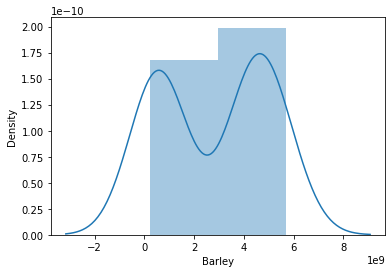

In [7]:
sns.distplot(Barley_DS['Barley'])

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BarleySqrt', ylabel='Density'>

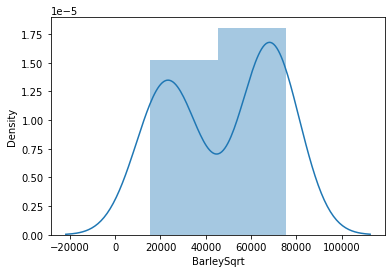

In [29]:
# Data doesnt look normalised.

# Trying SQRT

Barley_DS['BarleySqrt'] = np.sqrt(Barley_DS['Barley'])

sns.distplot(Barley_DS['BarleySqrt'])

In [23]:
#def normalize(column):
 ### y = (column - lower)/(upper-lower)
    #return y
#helpful_normalized = normalize(Barley_DS.Barley)
#helpful_normalized.describe()

count    24.000000
mean      0.471060
std       0.392049
min       0.000000
25%       0.046005
50%       0.728247
75%       0.778262
max       1.000000
Name: Barley, dtype: float64

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BarleyLog', ylabel='Density'>

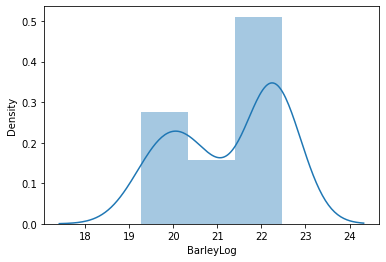

In [31]:
# The data didnt get normailsed.
# Trying log


Barley_DS['BarleyLog'] = np.log(Barley_DS['Barley'])

sns.distplot(Barley_DS['BarleyLog'])

In [35]:
# Log positively skewed the data.. so let's keep the original.


Barley_DS = Barley_DS[['Year','Barley']]


## Homogeneity of Variance

In [8]:
# Usign Fligner's test, since data doesnt look quite normal

scipy.stats.fligner(Barley_DS['Barley'], Barley_DS['Year'])


FlignerResult(statistic=30.47275667447692, pvalue=3.385880933547052e-08)

In [37]:
# Since the p value is still < .05, it means we have violated the assumption of homogeneity of variance.

## Correcting for Violations of Homogeneity of Variance


In [9]:
# Since we meet the Sample Size assumption, we'll go with

# Computing ANOVAs with Unequal Variance (Violated Homogeneity of Variance Assumption)

postHoc = MultiComparison(Barley_DS['Barley'], Barley_DS['Year'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2    meandiff   p-adj lower upper reject
----------------------------------------------------
  1998   1999   125478000.0   nan   nan   nan  False
  1998   2000    67816000.0   nan   nan   nan  False
  1998   2001   140604000.0   nan   nan   nan  False
  1998   2002   258532000.0   nan   nan   nan  False
  1998   2003   222698000.0   nan   nan   nan  False
  1998   2004   226780000.0   nan   nan   nan  False
  1998   2005  4499082000.0   nan   nan   nan  False
  1998   2006  5046840000.0   nan   nan   nan  False
  1998   2007  5447156000.0   nan   nan   nan  False
  1998   2008  5026076000.0   nan   nan   nan  False
  1998   2009  5115726000.0   nan   nan   nan  False
  1998   2010  4103769000.0   nan   nan   nan  False
  1998   2011  4167681000.0   nan   nan   nan  False
  1998   2012  3991462000.0   nan   nan   nan  False
  1998   2013   684916000.0   nan   nan   nan  False
  1998   2014  3991116000.0   nan   nan   nan 

/opt/homebrew/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/homebrew/lib/python3.9/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [39]:
Barley_DS

,Year,Barley
0,1998,235884000
1,1999,361362000
2,2000,303700000
3,2001,376488000
4,2002,494416000
5,2003,458582000
6,2004,462664000
7,2005,4734966000
8,2006,5282724000
9,2007,5683040000


In [28]:
helpful_normalized
# helpful_normalized

0     0.000000
1     0.023036
2     0.012450
3     0.025812
4     0.047462
5     0.040883
6     0.041633
7     0.825951
8     0.926509
9     1.000000
10    0.922697
11    0.939155
12    0.753378
13    0.765111
14    0.732761
15    0.125738
16    0.732697
17    0.723876
18    0.732619
19    0.750414
20    0.125737
21    0.114079
22    0.125737
23    0.817714
Name: Barley, dtype: float64